# ☎️ Telco Customer Churn Clustering
===========================================================
<br />

## 📊 Dataset: 
* https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv
* 7K+ records containing customer details for a Telco company and whether the customer churned or not in the last month

## ✅ Goals of Analysis:
* Clean and prepare data for cluster analysis
* Conduct feature selection (there are 21 attributes and it's best to find the attributes most closely related to churn to input into the k-means clustering algorithm)
* Employ the Elbow Chart Method to identify the best number of clusters to use as the k-means parameter
* Analyze and describe clusters

### Data Cleaning

In [108]:
import pandas as pd

data = pd.read_csv('Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [109]:
#there are no null values in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
#dropping customerID as this is not useful for analysis

data = data.drop('customerID', axis = 1)

In [111]:
#there are a certain amount of TotalCharges that are filled with blank space
data[data['TotalCharges'] == ' ']

#remove those rows from the dataset
data = data[data['TotalCharges'] != ' ']

In [112]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [113]:
data = pd.get_dummies(data, columns = ['gender', 'Partner', 'SeniorCitizen', 'Dependents',
                               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                             'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'])
data

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,0,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,No,1,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,No,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,Yes,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [114]:
data['Churn'] = data['Churn'].astype('category')
data['Churn'] = data['Churn'].cat.codes

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int8   
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   SeniorCitizen_0                          7032 non-null   uint8  
 9   SeniorCitizen_1                          7032 non-null   uint8  
 10  Dependents_No                            7032 no

### Dimensionality Reduction using Random Forest

In [116]:
train = data['Churn']
data2 = data.drop('Churn', axis=1)

In [117]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(data2, train)


RandomForestRegressor(max_depth=10, random_state=1)

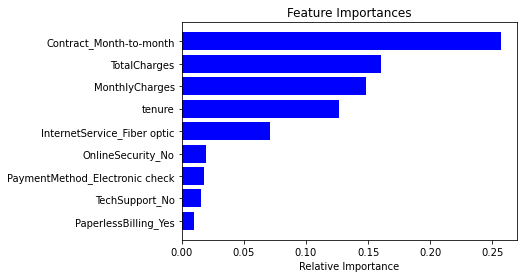

In [157]:
import numpy as np


#below code modeled from: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
features = data2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Already, based on the above chart, you can see the top attributes affecting retention.

Look at Pearson correlaton between all attributes and the churn attribute.

In [121]:
from scipy import stats

i = 0
for column in data2:
    a = pearsonr(train, data2[column])
    i += 1
    print(i, end = '\t' )
    for item in a:
        print(round(item, 2), end = '\t')
    print(column)

1	-0.35	0.0	tenure
2	0.19	0.0	MonthlyCharges
3	-0.2	0.0	TotalCharges
4	0.01	0.47	gender_Female
5	-0.01	0.47	gender_Male
6	0.15	0.0	Partner_No
7	-0.15	0.0	Partner_Yes
8	-0.15	0.0	SeniorCitizen_0
9	0.15	0.0	SeniorCitizen_1
10	0.16	0.0	Dependents_No
11	-0.16	0.0	Dependents_Yes
12	-0.01	0.33	PhoneService_No
13	0.01	0.33	PhoneService_Yes
14	-0.03	0.01	MultipleLines_No
15	-0.01	0.33	MultipleLines_No phone service
16	0.04	0.0	MultipleLines_Yes
17	-0.12	0.0	InternetService_DSL
18	0.31	0.0	InternetService_Fiber optic
19	-0.23	0.0	InternetService_No
20	0.34	0.0	OnlineSecurity_No
21	-0.23	0.0	OnlineSecurity_No internet service
22	-0.17	0.0	OnlineSecurity_Yes
23	0.27	0.0	OnlineBackup_No
24	-0.23	0.0	OnlineBackup_No internet service
25	-0.08	0.0	OnlineBackup_Yes
26	0.25	0.0	DeviceProtection_No
27	-0.23	0.0	DeviceProtection_No internet service
28	-0.07	0.0	DeviceProtection_Yes
29	0.34	0.0	TechSupport_No
30	-0.23	0.0	TechSupport_No internet service
31	-0.16	0.0	TechSupport_Yes
32	0.13	0.0	StreamingTV

In [158]:
indices

array([41, 28, 44, 19, 17,  0,  1,  2, 37])

In [159]:
filtered_data = pd.DataFrame()

for item in indices:
    for column in data2:
        if data2.columns.get_loc(column) == item:
            filtered_data[column] = data2[column]
            continue
        else:
            pass

filtered_data['Churn'] = train
filtered_data

,PaperlessBilling_Yes,TechSupport_No,PaymentMethod_Electronic check,OnlineSecurity_No,InternetService_Fiber optic,tenure,MonthlyCharges,TotalCharges,Contract_Month-to-month,Churn
0,1,1,1,1,0,1,29.85,29.85,1,0
1,0,1,0,0,0,34,56.95,1889.50,0,0
2,1,1,0,0,0,2,53.85,108.15,1,1
3,0,0,0,0,0,45,42.30,1840.75,0,0
4,1,1,1,1,1,2,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,24,84.80,1990.50,0,0
7039,1,1,0,1,1,72,103.20,7362.90,0,0
7040,1,1,1,0,0,11,29.60,346.45,1,0
7041,1,1,0,1,1,4,74.40,306.60,1,1


### Decide Number of Clusters Using Elbow Method

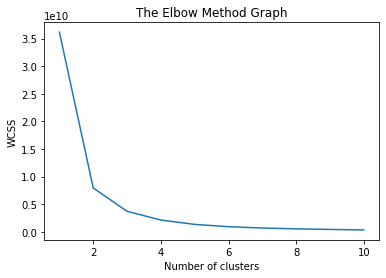

In [160]:
from sklearn.cluster import KMeans

#list to hold the within cluster sum of squares

wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                   n_init=10, random_state=0)
    kmeans.fit(filtered_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [161]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(filtered_data)

In [162]:
filtered_data.columns

Index(['PaperlessBilling_Yes', 'TechSupport_No',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No',
       'InternetService_Fiber optic', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Contract_Month-to-month', 'Churn'],
      dtype='object')

In [163]:
#add cluster assignment to dataframe
filtered_data['cluster'] = y_kmeans

#make sure the cluster sizes seem appropriate
filtered_data['cluster'].value_counts()

0    4163
2    1611
1    1258
Name: cluster, dtype: int64

In [165]:
#create a new dataframe for each cluster
cluster1 = filtered_data[filtered_data['cluster'] == 0].drop('cluster', axis = 1)
cluster2 = filtered_data[filtered_data['cluster'] == 1].drop('cluster', axis = 1)
cluster3 = filtered_data[filtered_data['cluster'] == 2].drop('cluster', axis = 1)


#function to look at the properties of each cluster
def cluster_info(cluster):
    print('Population: {}'.format(cluster.shape[0]))
    for column in cluster:
        if (column == 'MonthlyCharges') or (column == 'TotalCharges') or (column == 'tenure'):
            print(round((cluster[column].mean()), 2), end = '\t\t')
            print(column)
        else:
            hits = cluster[cluster[column]==1].shape[0]
            num = cluster.shape[0]
            perc = round(((hits/num)*100), 2)
            print(perc, end= '\t\t')
            print(column)

#view properties of each cluster
print('CLUSTER 1')          
cluster_info(cluster1)

print()
print('CLUSTER 2')
cluster_info(cluster2)

print()
print('CLUSTER 3')
cluster_info(cluster3)

CLUSTER 1
Population: 4163
52.68		PaperlessBilling_Yes
49.48		TechSupport_No
34.61		PaymentMethod_Electronic check
49.15		OnlineSecurity_No
31.44		InternetService_Fiber optic
18.25		tenure
49.77		MonthlyCharges
687.14		TotalCharges
68.87		Contract_Month-to-month
32.12		Churn

CLUSTER 2
Population: 1258
71.07		PaperlessBilling_Yes
40.14		TechSupport_No
28.78		PaymentMethod_Electronic check
42.29		OnlineSecurity_No
76.87		InternetService_Fiber optic
64.39		tenure
97.92		MonthlyCharges
6294.17		TotalCharges
18.12		Contract_Month-to-month
13.75		Churn

CLUSTER 3
Population: 1611
67.1		PaperlessBilling_Yes
56.3		TechSupport_No
34.89		PaymentMethod_Electronic check
57.05		OnlineSecurity_No
50.9		InternetService_Fiber optic
44.09		tenure
77.78		MonthlyCharges
3275.95		TotalCharges
48.42		Contract_Month-to-month
22.28		Churn


### Initial Cluster Results:

* Cluster 1: Most at risk to churn
    * Highest percentage of churned customers
    * Shortest average tenure
    * Lowest amount of avg monthly charges
    * Lowest amount of avg total charges
    * Highest percentage of month to month contracts
    * Lowest percentage of Fiber Optic Internet users
    * Lowest percentage enrolled in paperless billing
<br />
<br />
   
* Cluster 2: Least at risk to churn
    * Highest percent enrolled in paperless billing
    * Highest percent enrolled in tech support
    * Highest percent enrolled in online security
    * Nearly 77% enrolled in Fiber Optic Internet (highest of any cluster)
    * Longest average tenure
    * Highest avg monthly charges
    * Highest avg total charges
    * Lowest number of month to month contracts
<br />
<br />
* Cluster 3: Somewhat likely to churn
    * This group is basically in the middle of all the above mentioned qualities between cluster 1 and 2